# Project 7 - Anomaly Detection - Wilfredo Aaron Sosa Ramos

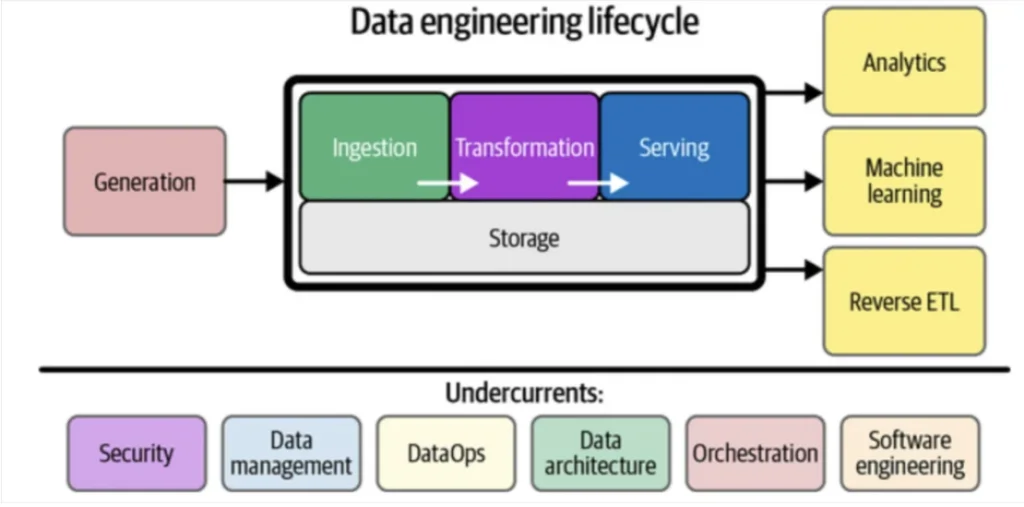

https://www.montecarlodata.com/blog-what-is-data-orchestration/

#Data Engineering Lifecycle

#Phase 1: Ingestion

In [35]:
#Mount the google drive connection to our dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [36]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/AI/Project 7/dataset/laptop_pricing_dataset.csv')

In [37]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


In [39]:
df.describe()

,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
count,238.000000,238.000000,238.000000,238.000000,238.000000,234.000000,238.000000,238.000000,238.000000,233.000000,238.000000
mean,118.500000,3.205882,2.151261,1.058824,5.630252,37.269615,2.360084,7.882353,245.781513,1.862232,1462.344538
std,68.848868,0.776533,0.638282,0.235790,1.241787,2.971365,0.411393,2.482603,34.765316,0.494332,574.607699
min,0.000000,1.000000,1.000000,1.000000,3.000000,30.480000,1.200000,4.000000,128.000000,0.810000,527.000000
25%,59.250000,3.000000,2.000000,1.000000,5.000000,35.560000,2.000000,8.000000,256.000000,1.440000,1066.500000
50%,118.500000,3.000000,2.000000,1.000000,5.000000,38.100000,2.500000,8.000000,256.000000,1.870000,1333.000000
75%,177.750000,4.000000,3.000000,1.000000,7.000000,39.624000,2.700000,8.000000,256.000000,2.200000,1777.000000
max,237.000000,5.000000,3.000000,2.000000,7.000000,43.942000,2.900000,16.000000,256.000000,3.600000,3810.000000


# Phase 2: Transformation

In [40]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Manufacturer    238 non-null    object 
 1   Category        238 non-null    int64  
 2   Screen          238 non-null    object 
 3   GPU             238 non-null    int64  
 4   OS              238 non-null    int64  
 5   CPU_core        238 non-null    int64  
 6   Screen_Size_cm  234 non-null    float64
 7   CPU_frequency   238 non-null    float64
 8   RAM_GB          238 non-null    int64  
 9   Storage_GB_SSD  238 non-null    int64  
 10  Weight_kg       233 non-null    float64
 11  Price           238 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 22.4+ KB


In [42]:
df.isnull().sum()

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64

In [43]:
df.isna().sum()

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64

In [44]:
df["Manufacturer"].unique()

array(['Acer', 'Dell', 'HP', 'Asus', 'Lenovo', 'Huawei', 'Toshiba', 'MSI',
       'Razer', 'Samsung', 'Xiaomi'], dtype=object)

In [45]:
df["Screen"].unique()

array(['IPS Panel', 'Full HD'], dtype=object)

Visualize the data

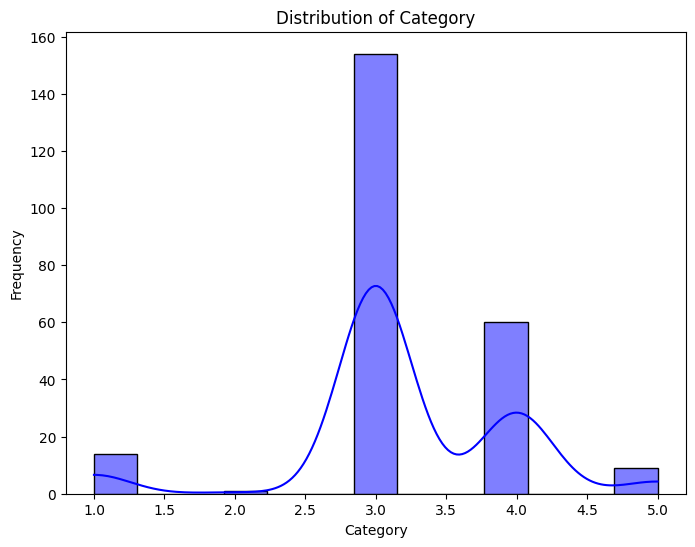

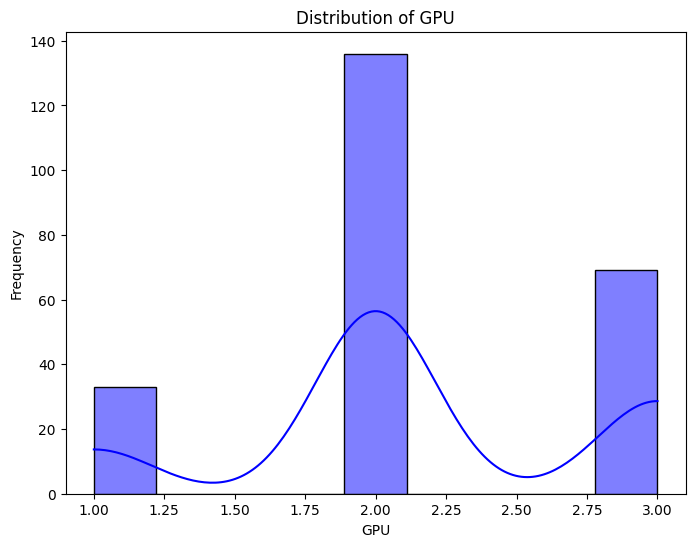

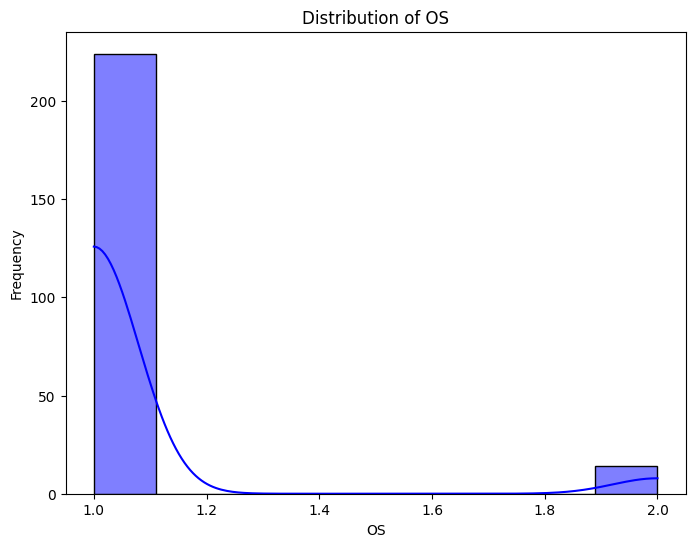

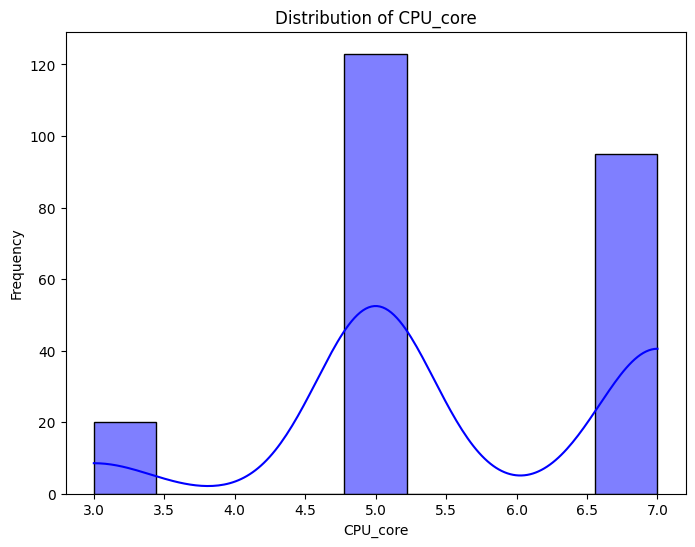

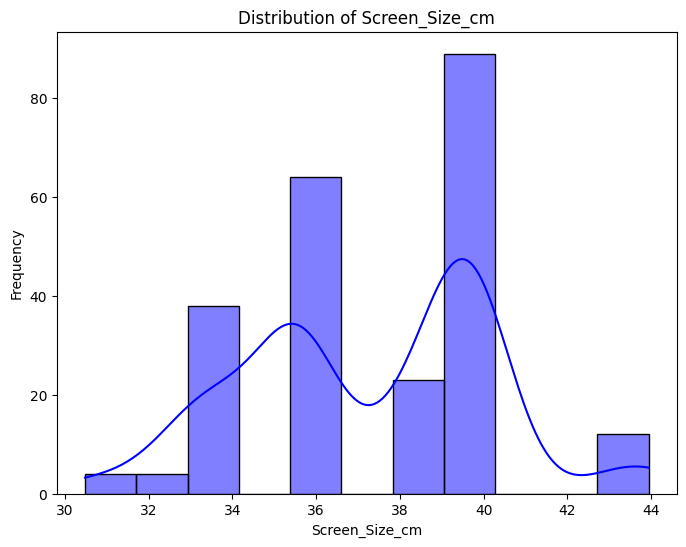

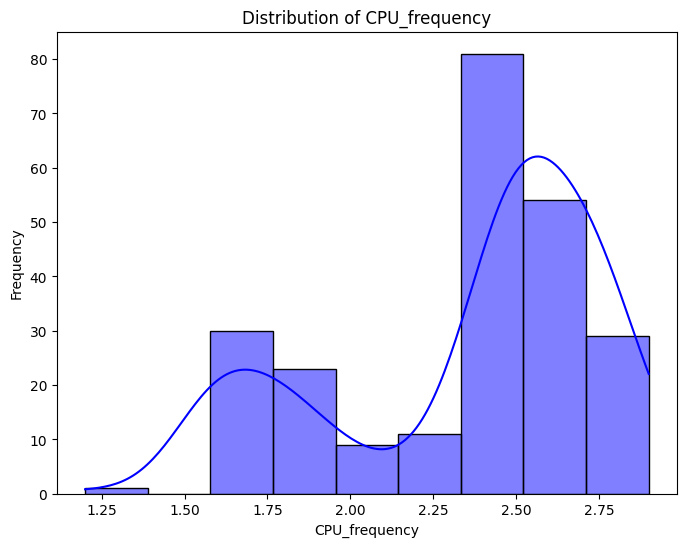

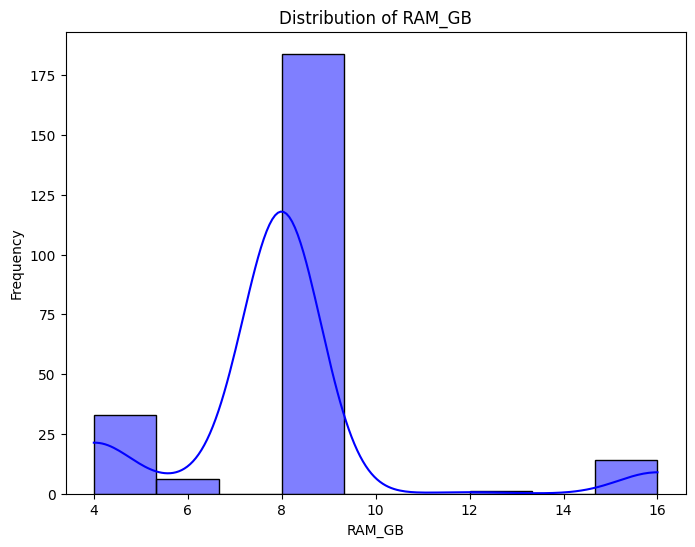

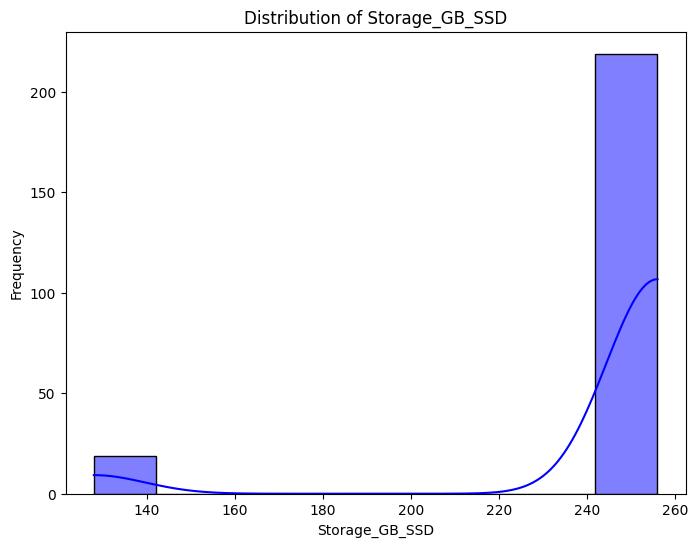

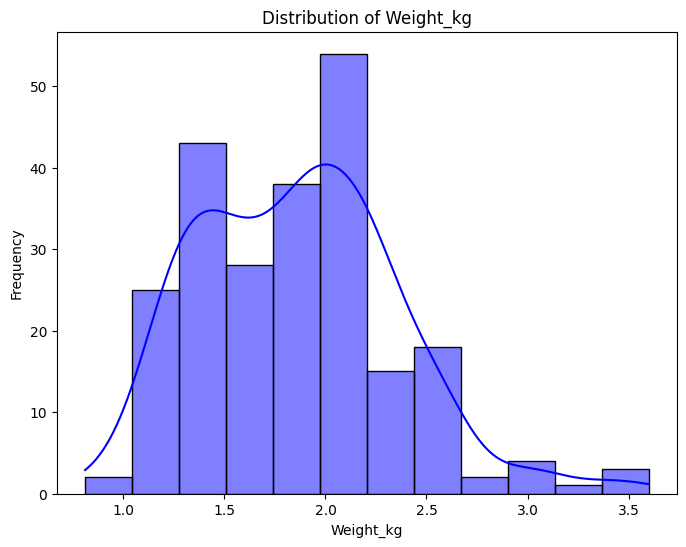

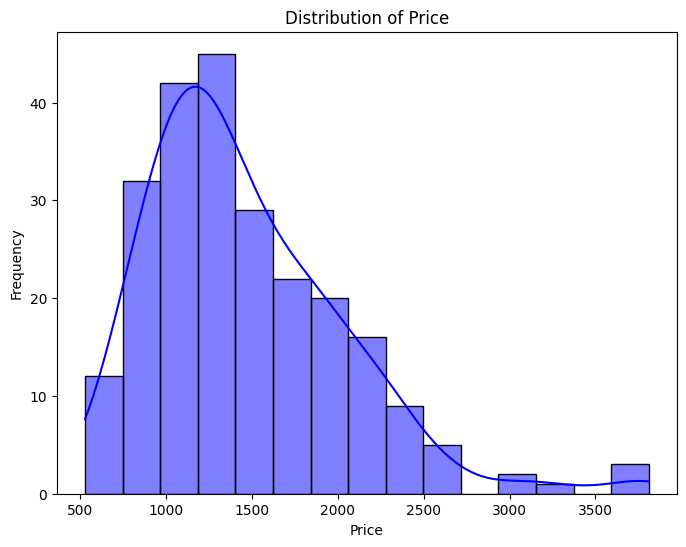

<ipython-input-46-eae17d6a7f85>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


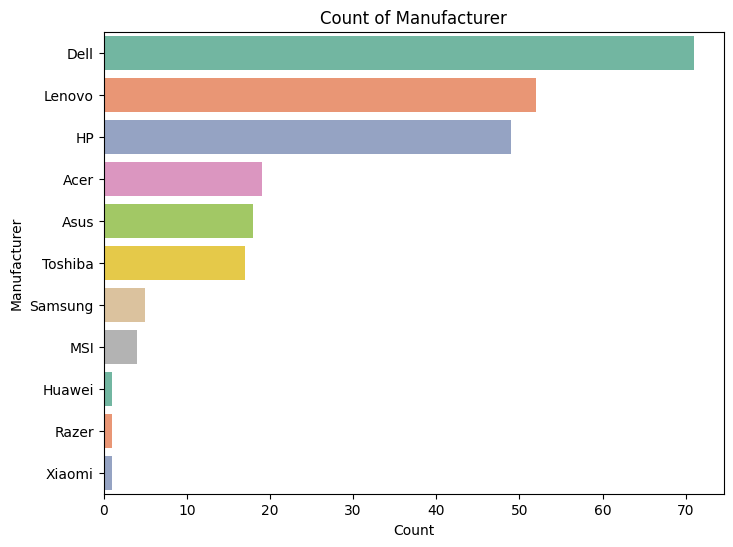

<ipython-input-46-eae17d6a7f85>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


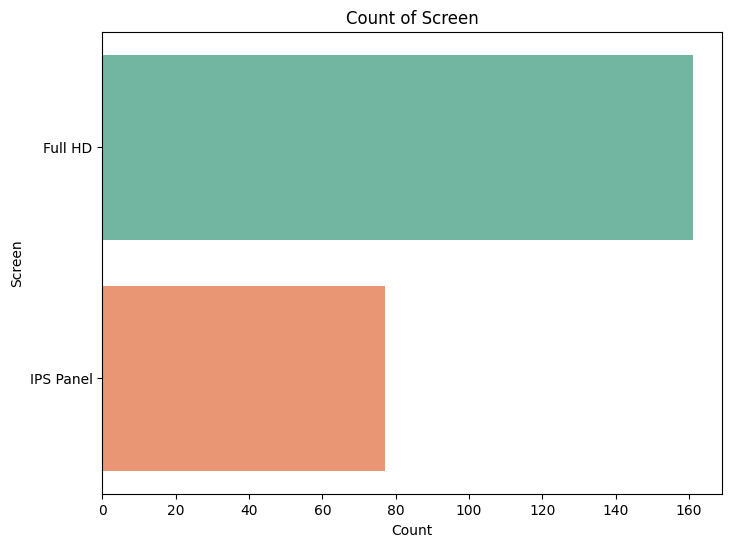

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_charts(df):
  # Numeric features
  numeric_features = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
  for feature in numeric_features:
      plt.figure(figsize=(8, 6))
      sns.histplot(df[feature], kde=True, color='blue')
      plt.title(f'Distribution of {feature}')
      plt.xlabel(feature)
      plt.ylabel('Frequency')
      plt.show()

  # Categorical features
  categorical_features = [col for col in df.columns if df[col].dtype == 'object']
  for feature in categorical_features:
      plt.figure(figsize=(8, 6))
      sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')
      plt.title(f'Count of {feature}')
      plt.xlabel('Count')
      plt.ylabel(feature)
      plt.show()

plot_charts(df)

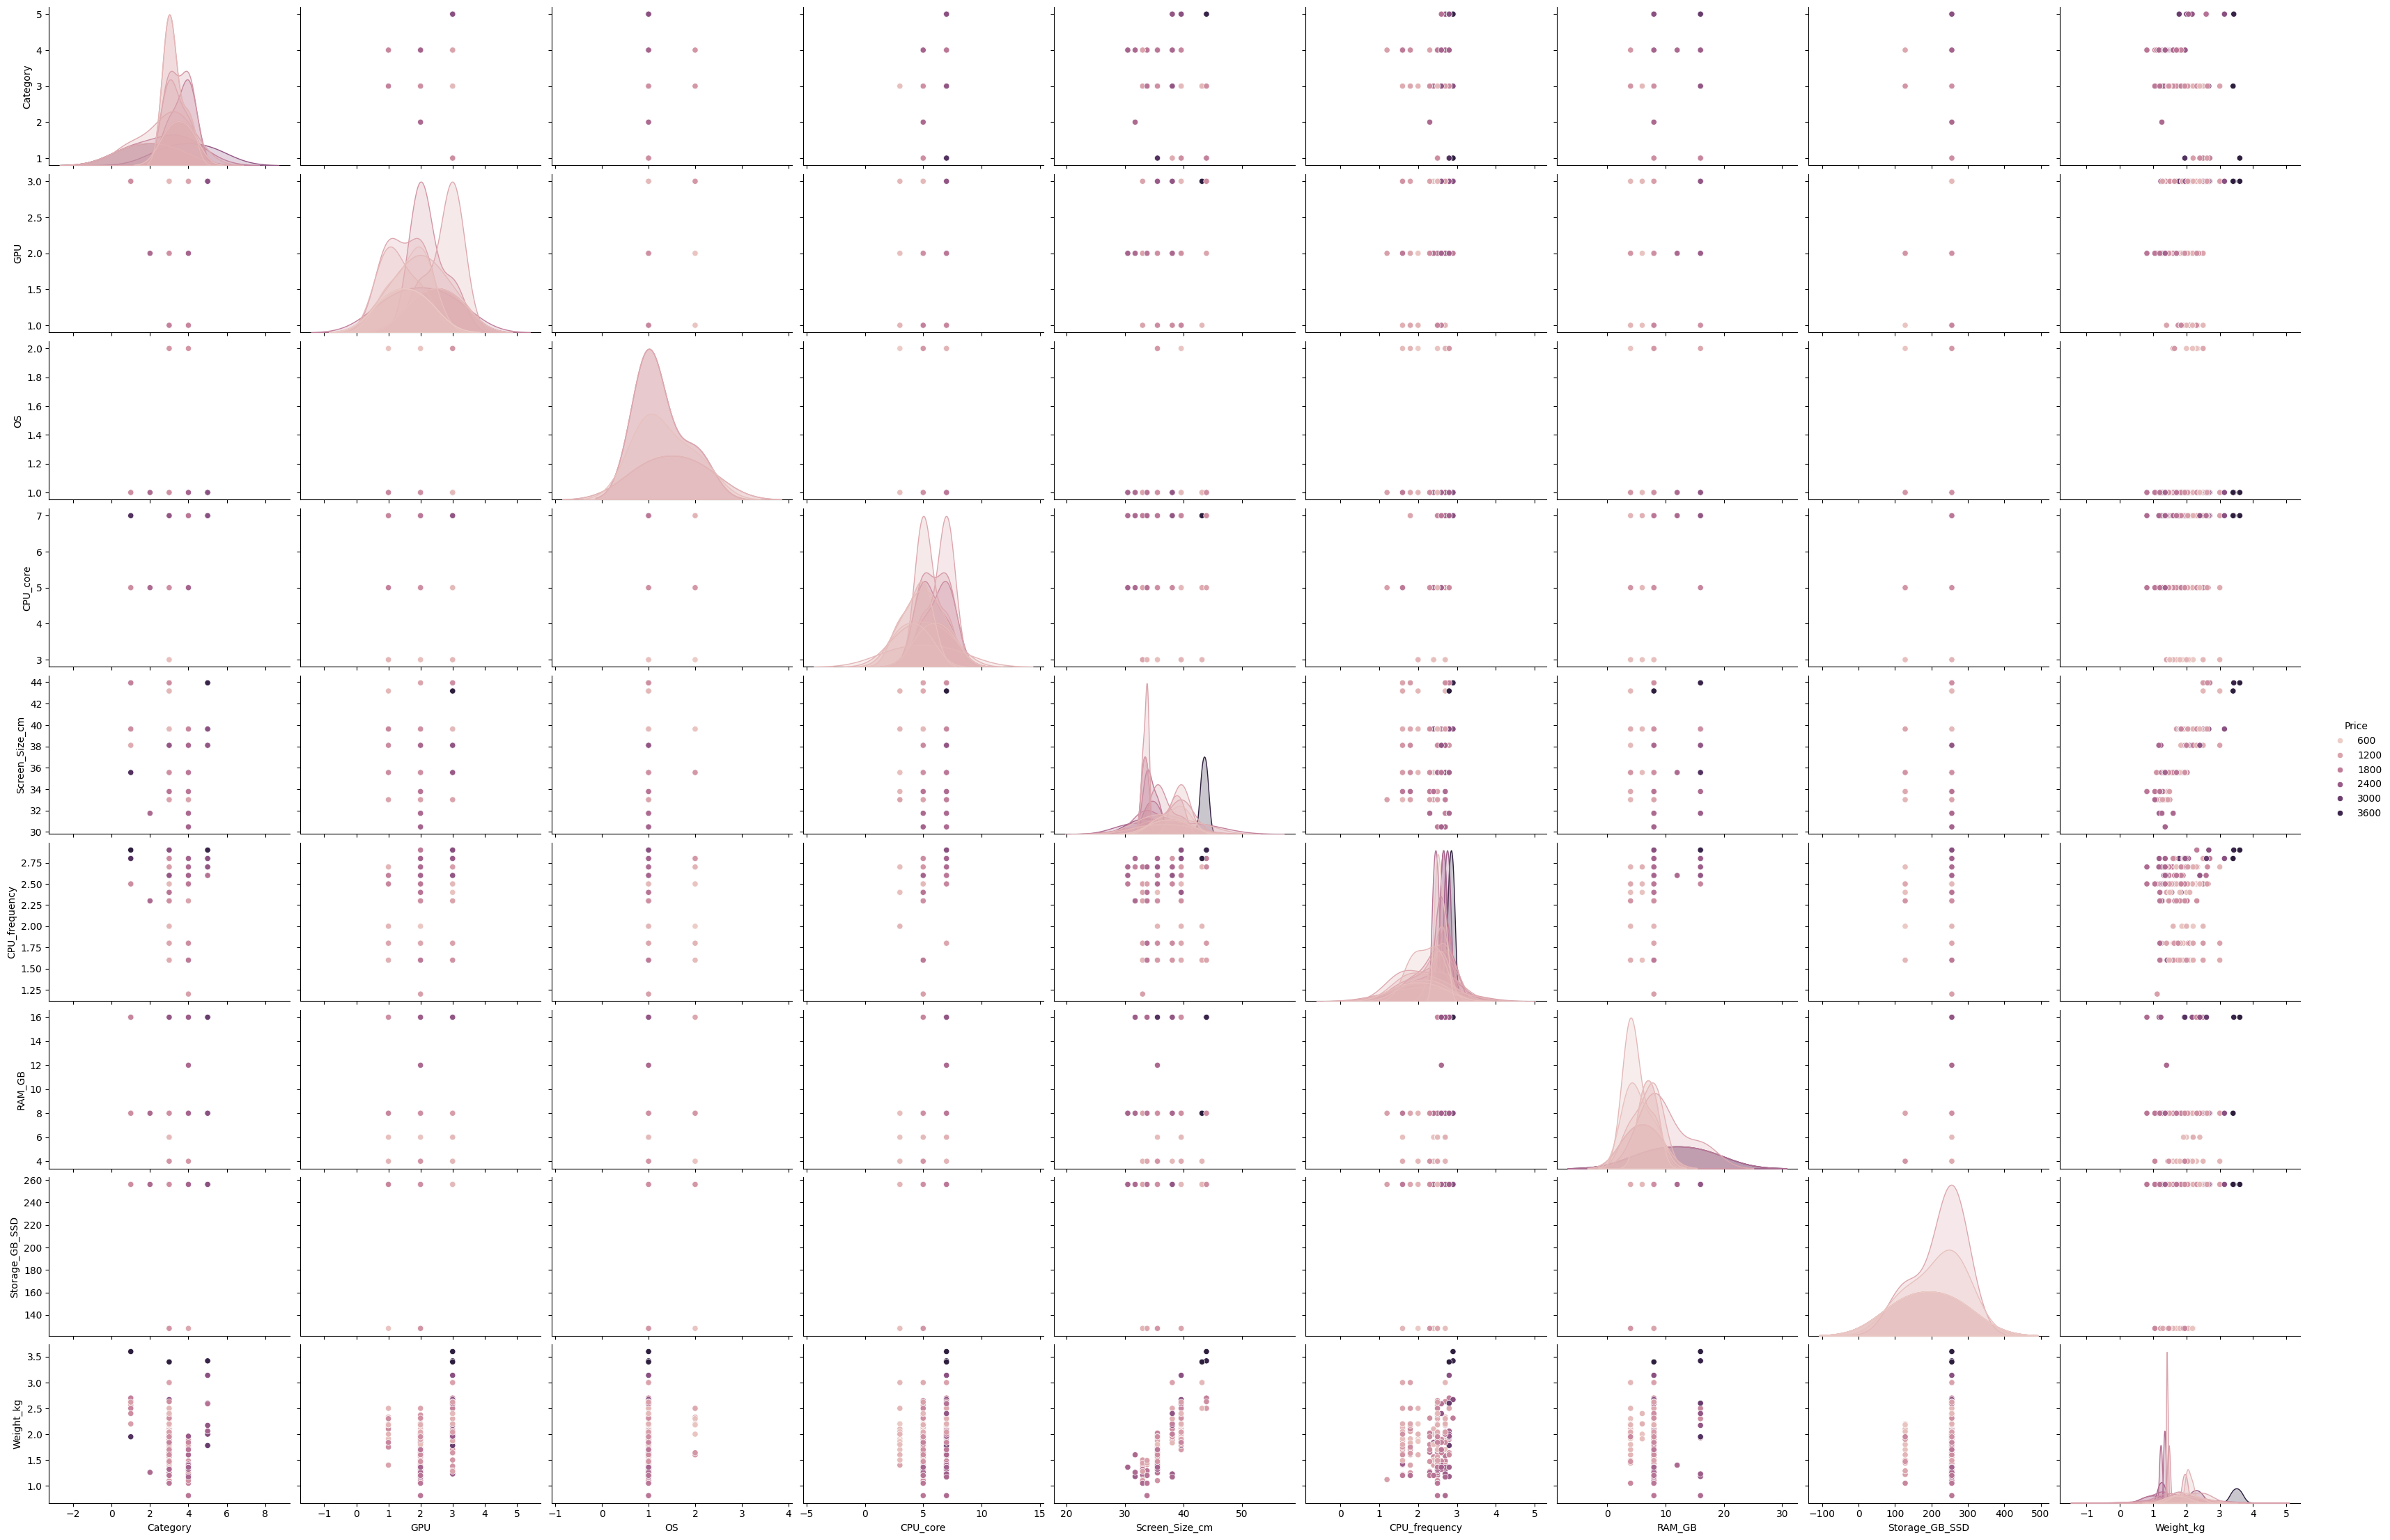

In [47]:
sns.pairplot(df, hue='Price', aspect=1.5)
plt.show()

In [48]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = ['Manufacturer', 'Screen']

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [50]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

In [51]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [52]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', cat_transformer, cat_features)
    ])

# Phase 3: Serving

In [53]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [54]:
print(__doc__)

Automatically created module for IPython interactive environment


In [62]:
df_encoded = preprocessor.fit_transform(df)

Settings

In [65]:
outliers_fraction = 0.15
n_samples = len(df_encoded)
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers
n_top_outliers = 10

Define outlier/anomaly detection methods to be compared

In [66]:
anomaly_algorithms = [
    ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction)),
    ("Isolation Forest", IsolationForest(contamination=outliers_fraction,
                                         random_state=42)),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf",
                                      gamma=0.1)),
    ("Local Outlier Factor", LocalOutlierFactor(
        n_neighbors=35, contamination=outliers_fraction))]

In [67]:
anomaly_results = {}

for name, algorithm in anomaly_algorithms:
    algorithm.fit(df_encoded)
    if name == "Local Outlier Factor":
        scores_pred = -algorithm.negative_outlier_factor_
    else:
        scores_pred = algorithm.decision_function(df_encoded)
    anomaly_results[name] = scores_pred

combined_scores = sum(anomaly_results.values())

top_outliers_indices = combined_scores.argsort()[:n_top_outliers]

/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:745: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


Visualize the algorithms

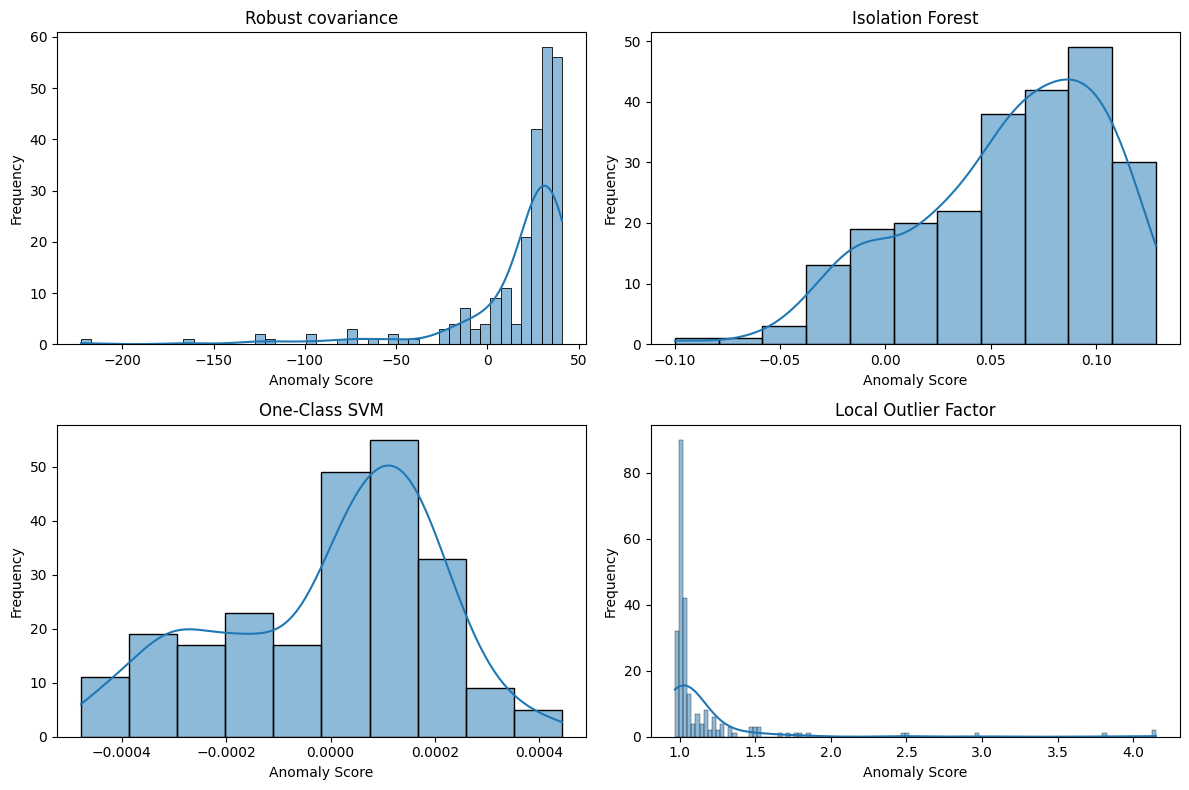

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_anomaly_results = pd.DataFrame(anomaly_results)

plt.figure(figsize=(12, 8))
for i, (name, _) in enumerate(anomaly_algorithms):
    plt.subplot(2, 2, i+1)
    sns.histplot(df_anomaly_results[name], kde=True)
    plt.title(name)
    plt.xlabel('Anomaly Score')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [70]:
top_outliers_data = df_anomaly_results.iloc[top_outliers_indices]

print("Top Outliers:")
print(top_outliers_data)

for name, _ in anomaly_algorithms:
    outlier_scores = anomaly_results[name][top_outliers_indices]
    print(f"{name} scores for top outliers:")
    print(outlier_scores)

Top Outliers:
     Robust covariance  Isolation Forest  One-Class SVM  Local Outlier Factor
64         -222.745563         -0.099874      -0.000124              4.148449
77         -165.310013         -0.049433       0.000034              3.812778
212        -127.285831         -0.013053      -0.000370              0.970814
47         -127.285831         -0.003642      -0.000174              1.014107
159        -116.503962         -0.064828      -0.000196              2.979671
180         -97.962372         -0.019501      -0.000294              2.503443
144         -97.239368         -0.020252       0.000142              4.148404
182         -78.076956         -0.036927       0.000162              1.069448
167         -76.003483         -0.005870      -0.000300              1.044174
210         -73.369962         -0.032343       0.000222              1.257796
Robust covariance scores for top outliers:
[-222.74556316 -165.31001265 -127.28583085 -127.28583085 -116.50396218
  -97.96237204